<a href="https://colab.research.google.com/github/davidfague/Stylized-ReducedOrder-L5-Model/blob/main/Detailed_model_HOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cd for google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Stylized-Cell-model/

/content/drive/MyDrive/Stylized-Cell-model


cd for server

In [ ]:
# cd Hay&Segev2015
# source /opt/python-bmtk//bin/activate
# cd simdata/L5PCbiophys3/N1_c0_cond0_seed50
# cd 

In [ ]:
%ls

 active_channel_model_example.ipynb       i_CaLva_report.hdf5
 active_channel_model_groundtruth.ipynb   ihcn_report.hdf5
 ca_df.csv                                Ih.ihcn_report.h5
 Ca_HVA.ica_report.h5                     inmda_report.h5
 Ca_LVAst.ica_report.h5                   i_nmda_report.hdf5
 Connections.csv                         'L5 Individual Basal Paths'/
 data.h5                                 'L5 Individual Oblique Paths'/
 Detailed_Ca_HVA.ica_report.h5           'L5 Individual Tuft Paths'/
 Detailed_Ca_LVAst.ica_report.h5          L5Morphology.swc
 Detailed_Connections.csv                 L5Morphology.swc.txt
 Detailed_Ih.ihcn_report.h5               mechanisms/
 Detailed_inmda_report.h5                 na_df.csv
 Detailed_NaTa_t.gNaTa_t_report.h5        NaTa_t.gNaTa_t_report.h5
 Detailed_v_report.h5                     nmda_df.csv
 Elec_distance.svg                        Segments.hdf5
 example_model_inject_waveform.ipynb      simdata/
 exc_syns.svg                    

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import math
import os
from pathlib import Path
import h5py
import csv

#X Coords
##extract X coordinates from txt file

In [ ]:
def getsegtracefromtxt(filename):
  #imports data
  data = np.genfromtxt(filename,delimiter=',')
  #drops the nan
  data1 = (data[:, ~np.isnan(data).any(axis=0)])
  #check to make sure its gone
  return data1

def createsegtracereport(reportname,dataname):
  try:
    os.remove(reportname) # reportname was string " "
  except:
    x = 1

  f = h5py.File(reportname,'w') #create a file in the w (write) mode #reportname was string ' '
  v = f.create_dataset("report/biophysical/data", data = dataname)
  f.close()

def getsegparamfromtxt(filename):
  temp = np.array(0)

  # read in csv
  with open(filename, newline='') as csvfile:
      data = csv.reader(csvfile, delimiter=',')
      for row in data:
          temp = np.append(temp,row)
  #remove 0
  temp = np.delete(temp,0)

  #removes extra values due to comma at the end
  new_arr = np.delete(temp, np.where(temp == ''))

  # makes into ints to make h5py happy
  data1 = np.array(new_arr).astype(float)
  return data1

In [ ]:
DsegID = list(range(642))
#print(DsegID)

DAllSegXCoord = getsegparamfromtxt('simdata//L5PCbiophys3/N1_c0_cond0_seed427/AllSegXCoordValuesN0.txt')
DAllSegYCoord = getsegparamfromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/AllSegYCoordValuesN0.txt')
DAllSegZCoord = getsegparamfromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/AllSegZCoordValuesN0.txt')
DAllSegElecDist = getsegparamfromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/AllSegElecDistValuesN0.txt')

Dinmda_data = getsegtracefromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/inmdaSegTracesN0.txt')
DgNaTa_t_data = getsegtracefromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/gNaTa_tSegTracesN0.txt')
Dica_HVA_data = getsegtracefromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/ica_HVASegTracesN0.txt')
Dica_LVAst_data = getsegtracefromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/ica_LVASegTracesN0.txt')
DIh_data = getsegtracefromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/IhTraceforEachSegmentN0.txt')
Dvolt_data = getsegtracefromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/voltageSegTracesN0.txt')
#print(Dinmda_data)

createsegtracereport('Detailed_v_report.h5',Dvolt_data)
createsegtracereport('Detailed_Ca_HVA.ica_report.h5',Dica_HVA_data)
createsegtracereport('Detailed_Ca_LVAst.ica_report.h5',Dica_LVAst_data)
createsegtracereport('Detailed_Ih.ihcn_report.h5',DIh_data)
createsegtracereport('Detailed_inmda_report.h5',Dinmda_data)
createsegtracereport('Detailed_NaTa_t.gNaTa_t_report.h5',DgNaTa_t_data)

In [ ]:
#Connections.csv
try:
  os.remove("Detailed_Connections.csv")
except:
  x = 1

connections_data = {
    #'Node ID':[SynParentSeg],'Distance':[SynDist],'Conductance':[gmax_list],'Type':[SynDist],'Name':[SynName],'Source Population':[SourcePop],'Release Probability':[P_0_list] #do not have these values
    }

# Create the pandas DataFrame with column name is provided explicitly
connections = pd.DataFrame(connections_data , columns=['Node ID','Distance','Conductance','Type','Name','Source Population','Release Probability'])
  
connections.to_csv('Detailed_Connections.csv')

In [ ]:
#Segments.csv

try:
  os.remove("Detailed_Segments.csv")
except:
  x = 1


Dsegments_data = {'BMTK ID':[DsegID],
                 #'X':[DSegX],'Type':[AllSegType],'Sec ID':[AllSegSection],'Distance':[AllSegDist], #not recorded yet
                 'Coord X':[DAllSegXCoord],'Coord Y':[DAllSegYCoord],'Coord Z':[DAllSegZCoord],'Elec_distance':[DAllSegElecDist]}
Dsegments = pd.DataFrame(Dsegments_data, columns = ['BMTK ID',
                                                  #'X','Type','Sec ID','Distance',
                                                  'Coord X','Coord Y','Coord Z','Elec_distance'])
print
Dsegments.to_csv('Detailed_Connections.csv')

#Try Plotting

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


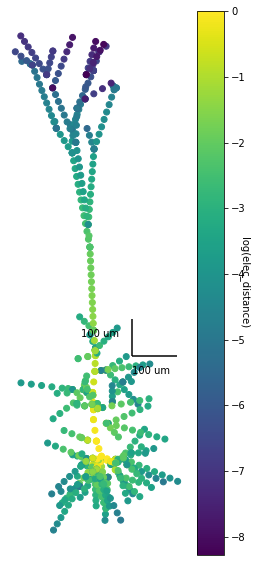

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(4,10))
ax = plt.scatter(DAllSegXCoord, DAllSegYCoord, c = np.log(DAllSegElecDist) )
plt.vlines(110,300,400)
plt.text(0,350,'100 um')
plt.hlines(300,110,210)
plt.text(110,250,'100 um')
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(elec_distance)', rotation=270)

plt.box(False)
plt.savefig('Elec_distance.svg')

Need to get excitatory syn per seg for the following graph

In [ ]:
# plt.figure(figsize=(4,10))
# ax = plt.scatter(DAllSegXCoord, DAllSegYCoord,c = DexcSynPerSeg[0:641],cmap='jet',)
# plt.vlines(110,400,500)
# plt.text(0,450,'100 um')
# plt.hlines(400,110,210)
# plt.text(110,350,'100 um')
# plt.xticks([])
# plt.yticks([])
# cbar = plt.colorbar()
# cbar.ax.set_ylabel('Synapses per segment', rotation=270)

# plt.box(False)
# plt.savefig('exc_syns.svg')

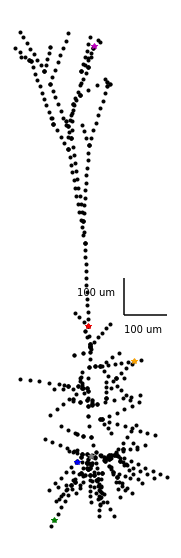

In [ ]:
plt.figure(figsize=(3,10))
ax = plt.plot(DAllSegXCoord, DAllSegYCoord,'.',color='k',markersize=6)
plt.vlines(110,400,500)
plt.text(0,450,'100 um')
plt.hlines(400,110,210)
plt.text(110,350,'100 um')
plt.xticks([])
plt.yticks([])
plt.box(False)

#need to adjust these
soma_probe = 0
nexus_seg = 379
axon_seg = 640
dist_tuft_seg = 552
dist_basal_seg = 221
oblique_seg = 330

plt.plot(DAllSegXCoord[soma_probe], 
         DAllSegYCoord[soma_probe],
         '*',color='grey')
plt.plot(DAllSegXCoord[nexus_seg], 
         DAllSegYCoord[nexus_seg],
         'r*')
plt.plot(DAllSegXCoord[axon_seg], 
         DAllSegYCoord[axon_seg],
         'b*')
plt.plot(DAllSegXCoord[dist_tuft_seg], 
         DAllSegYCoord[dist_tuft_seg],
         'm*')
plt.plot(DAllSegXCoord[dist_basal_seg], 
         DAllSegYCoord[dist_basal_seg],
         'g*')
plt.plot(DAllSegXCoord[oblique_seg], 
         DAllSegYCoord[oblique_seg],
         '*',color='orange')

#plt.savefig('fig1A.svg')

In [ ]:
tstop=1/.25

([], <a list of 0 Text major ticklabel objects>)

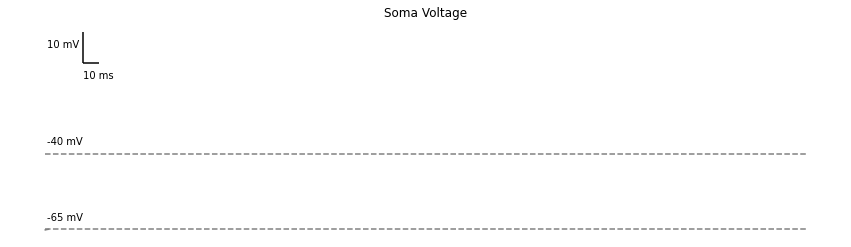

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(np.arange(0,((tstop)+.1),.1),Dvolt_data[soma_probe],color='grey')
plt.hlines(-65,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-40,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-10,50,70)
plt.vlines(50,-10,0)
plt.text(50,-15,'10 ms')
plt.text(2,-5,'10 mV')
plt.text(2,-37,'-40 mV')
plt.text(2,-62,'-65 mV')
plt.title('Soma Voltage')
plt.box(False)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

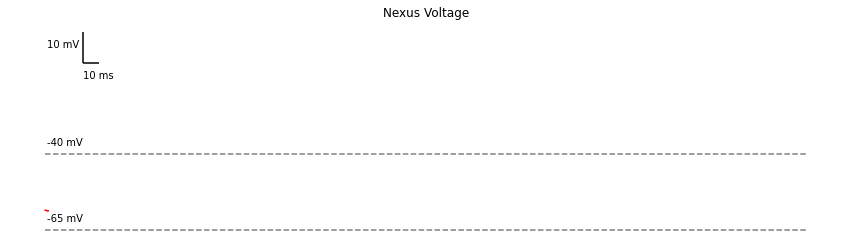

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(np.arange(0,((tstop)+.1),.1),Dvolt_data[nexus_seg],color='r')
plt.hlines(-65,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-40,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-10,50,70)
plt.vlines(50,-10,0)
plt.text(50,-15,'10 ms')
plt.text(2,-5,'10 mV')
plt.text(2,-37,'-40 mV')
plt.text(2,-62,'-65 mV')
plt.title('Nexus Voltage')
plt.box(False)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

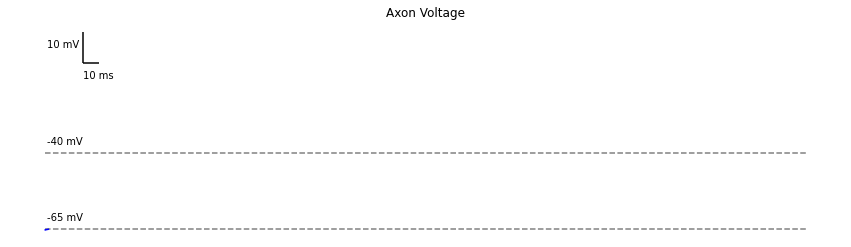

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(np.arange(0,((tstop)+.1),.1),Dvolt_data[axon_seg],color='b')
plt.hlines(-65,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-40,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-10,50,70)
plt.vlines(50,-10,0)
plt.text(50,-15,'10 ms')
plt.text(2,-5,'10 mV')
plt.text(2,-37,'-40 mV')
plt.text(2,-62,'-65 mV')
plt.title('Axon Voltage')
plt.box(False)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

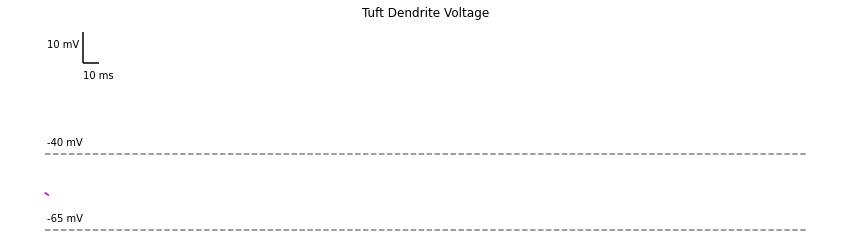

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(np.arange(0,((tstop)+.1),.1),Dvolt_data[dist_tuft_seg],color='m')
plt.hlines(-65,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-40,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-10,50,70)
plt.vlines(50,-10,0)
plt.text(50,-15,'10 ms')
plt.text(2,-5,'10 mV')
plt.text(2,-37,'-40 mV')
plt.text(2,-62,'-65 mV')
plt.title('Tuft Dendrite Voltage')
plt.box(False)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

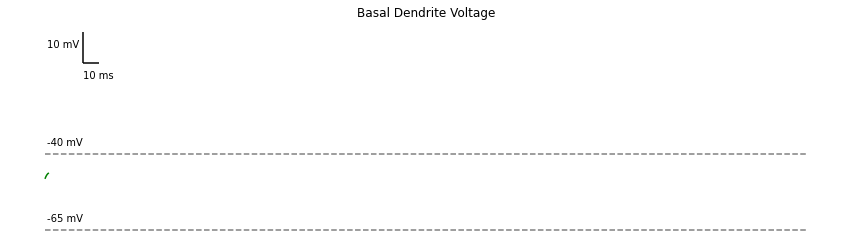

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(np.arange(0,((tstop)+.1),.1),Dvolt_data[dist_basal_seg],color='g')
plt.hlines(-65,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-40,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-10,50,70)
plt.vlines(50,-10,0)
plt.text(50,-15,'10 ms')
plt.text(2,-5,'10 mV')
plt.text(2,-37,'-40 mV')
plt.text(2,-62,'-65 mV')
plt.title('Basal Dendrite Voltage')
plt.box(False)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

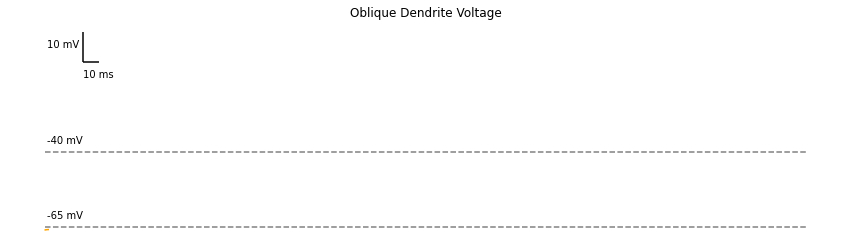

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(np.arange(0,((tstop)+.1),.1),Dvolt_data[oblique_seg],color='orange')
plt.hlines(-65,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-40,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-10,50,70)
plt.vlines(50,-10,0)
plt.text(50,-15,'10 ms')
plt.text(2,-5,'10 mV')
plt.text(2,-37,'-40 mV')
plt.text(2,-62,'-65 mV')
plt.title('Oblique Dendrite Voltage')
plt.box(False)
plt.xticks([])
plt.yticks([])

#T undefined
#Vrecord undefined

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline



# # Ca LVA current 

# plt.figure(figsize=(20,14))
# for i in range(Dica_LVAst_data.shape[0]):
#     plt.plot(t,Dica_LVAst_data[i,:])
#     plt.title(Vrecord[i], loc='center')
#     plt.ylabel('ica_LVAst')
#     plt.xlabel('ms')
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline


# # CA HVA current

# plt.figure(figsize=(20,14))
# for i in range(Dica_HVA_data.shape[0]):
#     plt.plot(t,Dica_HVA_data[i,:])
#     plt.title(Vrecord[i], loc='center')
#     plt.ylabel('ica_HVA')
#     plt.xlabel('ms')
#     plt.title('Detailed model iCa_HVA')
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline


# # h current

# plt.figure(figsize=(20,14))
# for i in range(Dih_data.shape[0]):
#     plt.plot(t,Dih_data[i,:])
#     plt.title(Vrecord[i], loc='center')
#     plt.ylabel('Ih')
#     plt.xlabel('ms')
#     plt.title('ih')
# plt.show()

In [ ]:
# sec = []
# for i in range(nseg-1):
#   if AllSegSection[i] >= 11 :
#     sec.append(i)

# print(len(sec))



# plt.figure(figsize=(20,14))
# for i in sec:
#     plt.plot(t,gNaTa_T_data[i,:])
#     plt.title(gNaTa_T, loc='center')
#     plt.ylabel('gNaTa_T')
#     plt.xlabel('ms')
#     plt.title('gNaTa_T')
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline


# #NMDA current 

# plt.figure(figsize=(20,14))
# for i in range(len(i_NMDA_bySeg)):
#     plt.plot(t,i_NMDA_bySeg[i])
#     plt.title(Vrecord[i], loc='center')
#     plt.ylabel('i_NMDA')
#     plt.xlabel('ms')
#     plt.title('i_NMDA in every segment')
# plt.show()

In [ ]:



# #NMDA current 

# plt.figure(figsize=(20,14))
# for i in range(len(v_dend)):
#     plt.plot(t,v_dend[i])
#     plt.title(Vrecord[i], loc='center')
#     plt.ylabel('v dend ')
#     plt.xlabel('ms')
#     plt.title('NMDA current')
# plt.show()